In [3]:
import pandas as pd
import glob
import numpy as np
from multiprocessing import Pool
from multiprocessing import cpu_count
num_partitions = cpu_count()

In [2]:
# df = pd.read_json(r"/home/ubuntu/data/resolute/resolute/Achaia Aigeira_3313351.json", lines=True)
#scp -i ~/.ssh/ansible-user.pem revolut.ipynb ubuntu@10.91.52.118:/home/ubuntu/

In [3]:
def json_to_dataframe(all_files_sample):
    column_list = ['Neighbourhood',
                   'Area_sqm', 'PropertyType',
                   'Bedrooms', 'Bathrooms', 'Rooms', 'Floor', 'Levels',
                   'PriceEuro','PricePerM2Euro',
                   'Latitude', 'Longitude',
                   'ConstructionYear', 'ModifiedOn']
    li = []
    
    for filename in all_files_sample:
        df = pd.read_json(filename, lines=True)[column_list]
        li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
    
    return frame

In [4]:
path = r"/home/ubuntu/data/resolute/resolute" # use your path
all_files = glob.glob(path + "/*.json")

In [5]:
all_files_split = np.array_split(all_files, num_partitions)

In [6]:
with Pool(processes=num_partitions) as pool1:
    super_frame = pd.concat(pool1.map(json_to_dataframe, all_files_split))

In [7]:
super_frame.head()

,Neighbourhood,Area_sqm,PropertyType,Bedrooms,Bathrooms,Rooms,Floor,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude,ConstructionYear,ModifiedOn
0,Cyclades Paros,80,Maisonette,3,0,0,2,0,155000,1938,0.000000,0.000000,Under construction,2019-04-24T00:00:00Z
1,Corinthia Vocha,154,Store,0,0,1,Ground floor,0,180000,1169,0.000000,0.000000,1960,2018-11-16T00:00:00Z
2,Athens - South Nea Smyrni,60,Office,0,0,0,2,0,63000,1050,0.000000,0.000000,1993,2019-04-24T00:00:00Z
3,Thessaloniki - Suburbs Thermi,1850,Business building,0,0,0,Ground floor,3,1650000,892,40.515778,22.991291,2002,2019-04-24T00:00:00Z
4,Kavala Prefecture Thasos,5000,Parcel,0,0,0,,0,75000,15,40.693836,24.556259,,2019-04-30T00:00:00Z


In [8]:
# convert to datetime object
super_frame['ModifiedOn'] = pd.to_datetime(super_frame['ModifiedOn'])

In [9]:
super_frame.dtypes

Neighbourhood               object
Area_sqm                     int64
PropertyType                object
Bedrooms                     int64
Bathrooms                    int64
Rooms                        int64
Floor                       object
Levels                       int64
PriceEuro                    int64
PricePerM2Euro               int64
Latitude                   float64
Longitude                  float64
ConstructionYear            object
ModifiedOn          datetime64[ns]
dtype: object

In [40]:
super_frame.sample()

,Neighbourhood,Area_sqm,PropertyType,Bedrooms,Bathrooms,Rooms,Floor,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude,ConstructionYear,ModifiedOn
10238,Argolis Argos,1037,Land Plot,0,0,0,,0,130000,125,37.626694,22.731579,,2019-04-16


In [11]:
super_frame.describe()

,Area_sqm,Bedrooms,Bathrooms,Rooms,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude
count,1.502740e+05,150274.000000,150274.000000,150274.000000,150274.000000,1.502740e+05,1.502740e+05,150274.000000,150274.000000
mean,5.451381e+03,1.341210,1.073745,0.669224,0.553961,4.843534e+05,1.300538e+03,23.406177,14.102950
std,3.015531e+05,2.351148,10.263033,6.091915,1.299994,1.591944e+06,5.097739e+03,18.972363,11.611452
min,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-5.000000,-180.000000
25%,1.000000e+02,0.000000,0.000000,0.000000,0.000000,7.500000e+04,2.500000e+02,0.000000,0.000000
50%,2.300000e+02,0.000000,1.000000,0.000000,0.000000,1.700000e+05,9.270000e+02,37.799805,22.770436
75%,8.000000e+02,2.000000,1.000000,0.000000,0.000000,4.000000e+05,1.714000e+03,38.331142,23.730021
max,9.000000e+07,255.000000,999.000000,255.000000,100.000000,1.000000e+08,1.230769e+06,85.051132,40.752640


## Save to csv

In [13]:
# super_frame.to_csv('df_resolute.csv', index=False)

In [4]:
super_frame = pd.read_csv('df_resolute.csv', keep_default_na=False)
# convert to datetime object
super_frame['ModifiedOn'] = pd.to_datetime(super_frame['ModifiedOn'])

In [6]:
super_frame.dtypes

Neighbourhood               object
Area_sqm                     int64
PropertyType                object
Bedrooms                     int64
Bathrooms                    int64
Rooms                        int64
Floor                       object
Levels                       int64
PriceEuro                    int64
PricePerM2Euro               int64
Latitude                   float64
Longitude                  float64
ConstructionYear            object
ModifiedOn          datetime64[ns]
dtype: object

In [7]:
super_frame[super_frame['PricePerM2Euro']==0]

,Neighbourhood,Area_sqm,PropertyType,Bedrooms,Bathrooms,Rooms,Floor,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude,ConstructionYear,ModifiedOn
75,Kavala Prefecture Orfano,1500,Parcel,0,0,0,,0,1111,0,40.748215,23.977758,,2019-03-29
1353,Corinthia Korinthos,20473,Parcel,0,0,0,,0,0,0,0.000000,0.000000,,2019-04-22
1445,Magnesia Milies,138,Maisonette,2,2,0,Ground floor,3,0,0,39.342712,23.085251,Under construction,2019-04-30
1534,Argolis Asini,25000,Parcel,0,0,0,,0,15000,0,0.000000,0.000000,,2019-03-07
1663,Chania Prefecture Kissamos,1200000,Land Plot,0,0,0,,0,1200000,0,35.498779,23.648056,,2018-04-19
3141,Xanthi Prefecture Xanthi,4000,Parcel,0,0,0,,0,1000,0,41.130001,24.876968,,2019-04-20
3507,Piraeus suburbs Nikaia,1452,Store,0,0,0,Ground floor,3,0,0,0.000000,0.000000,2007,2019-04-22
4452,Serres Prefecture Kato Mitrousi,14000,Parcel,0,0,0,,0,14000,0,41.058064,23.402529,,2019-04-29
6672,Rodopi Prefecture Maroneia,15000,Parcel,0,0,0,,0,11000,0,0.000000,0.000000,,2019-01-19
6725,Athens - North Chalandri,84,Apartment,2,1,0,3,0,0,0,38.022324,23.802820,2015,2019-04-16


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe37296ba58>]],
      dtype=object)

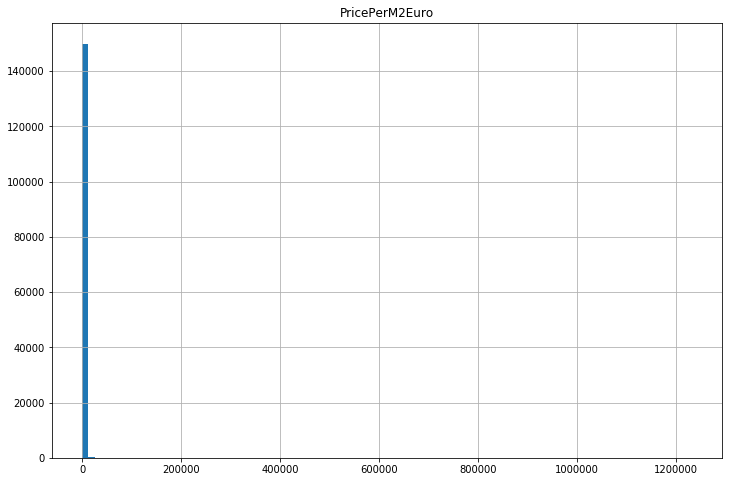

In [9]:
super_frame.query("PriceEuro>10").hist(column='PricePerM2Euro',bins=100,figsize=(12,8))

In [10]:
super_frame.head()

,Neighbourhood,Area_sqm,PropertyType,Bedrooms,Bathrooms,Rooms,Floor,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude,ConstructionYear,ModifiedOn
0,Cyclades Paros,80,Maisonette,3,0,0,2,0,155000,1938,0.000000,0.000000,Under construction,2019-04-24
1,Corinthia Vocha,154,Store,0,0,1,Ground floor,0,180000,1169,0.000000,0.000000,1960,2018-11-16
2,Athens - South Nea Smyrni,60,Office,0,0,0,2,0,63000,1050,0.000000,0.000000,1993,2019-04-24
3,Thessaloniki - Suburbs Thermi,1850,Business building,0,0,0,Ground floor,3,1650000,892,40.515778,22.991291,2002,2019-04-24
4,Kavala Prefecture Thasos,5000,Parcel,0,0,0,,0,75000,15,40.693836,24.556259,,2019-04-30


In [47]:
# should we create a year range? 70s, 80s, 90s, 00s, 10s, 20s ? 
super_frame.ConstructionYear.value_counts(sort=True).head()

                      57471
2010                   5550
Under construction     5496
-                      4241
1980                   4005
Name: ConstructionYear, dtype: int64

## Describe 

In [24]:
super_frame.count()

Neighbourhood       150274
Area_sqm            150274
PropertyType        150274
Bedrooms            150274
Bathrooms           150274
Rooms               150274
Floor               150274
Levels              150274
PriceEuro           150274
PricePerM2Euro      150274
Latitude            150274
Longitude           150274
ConstructionYear    150274
ModifiedOn          150274
dtype: int64

In [89]:
super_frame.describe()

,Area_sqm,Bedrooms,Bathrooms,Rooms,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude
count,1.502740e+05,150274.000000,150274.000000,150274.000000,150274.000000,1.502740e+05,1.502740e+05,150274.000000,150274.000000
mean,5.451381e+03,1.341210,1.073745,0.669224,0.553961,4.843534e+05,1.300538e+03,23.406177,14.102950
std,3.015531e+05,2.351148,10.263033,6.091915,1.299994,1.591944e+06,5.097739e+03,18.972363,11.611452
min,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-5.000000,-180.000000
25%,1.000000e+02,0.000000,0.000000,0.000000,0.000000,7.500000e+04,2.500000e+02,0.000000,0.000000
50%,2.300000e+02,0.000000,1.000000,0.000000,0.000000,1.700000e+05,9.270000e+02,37.799805,22.770436
75%,8.000000e+02,2.000000,1.000000,0.000000,0.000000,4.000000e+05,1.714000e+03,38.331142,23.730021
max,9.000000e+07,255.000000,999.000000,255.000000,100.000000,1.000000e+08,1.230769e+06,85.051132,40.752640


In [95]:
# bins=[-100000000,20000,40000,60000,80000,100000,1000000,10000000,500000000]
# choices =['0-200k','200k-400k','400k-600k','600k-800k','800k-1mlln','1mlln-10mlln','10mlln-100mlln','100mlln-500mlln']
# super_frame['price_range']=pd.cut(super_frame['PriceEuro'],bins=bins,labels=choices)

In [11]:
super_frame.corr()

,Area_sqm,Bedrooms,Bathrooms,Rooms,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude
Area_sqm,1.000000,-0.009783,-0.001648,-0.000996,-0.006936,0.350536,-0.004297,0.001914,0.001527
Bedrooms,-0.009783,1.000000,0.102472,-0.062667,0.283708,0.026600,0.086560,0.033936,0.036869
Bathrooms,-0.001648,0.102472,1.000000,0.491379,0.060683,0.061293,0.017872,0.006979,0.006941
Rooms,-0.000996,-0.062667,0.491379,1.000000,0.088593,0.302590,0.027239,-0.012685,-0.011190
Levels,-0.006936,0.283708,0.060683,0.088593,1.000000,0.112683,0.058374,-0.007105,-0.000622
PriceEuro,0.350536,0.026600,0.061293,0.302590,0.112683,1.000000,0.167678,-0.036559,-0.028913
PricePerM2Euro,-0.004297,0.086560,0.017872,0.027239,0.058374,0.167678,1.000000,-0.005236,-0.001366
Latitude,0.001914,0.033936,0.006979,-0.012685,-0.007105,-0.036559,-0.005236,1.000000,0.979605
Longitude,0.001527,0.036869,0.006941,-0.011190,-0.000622,-0.028913,-0.001366,0.979605,1.000000


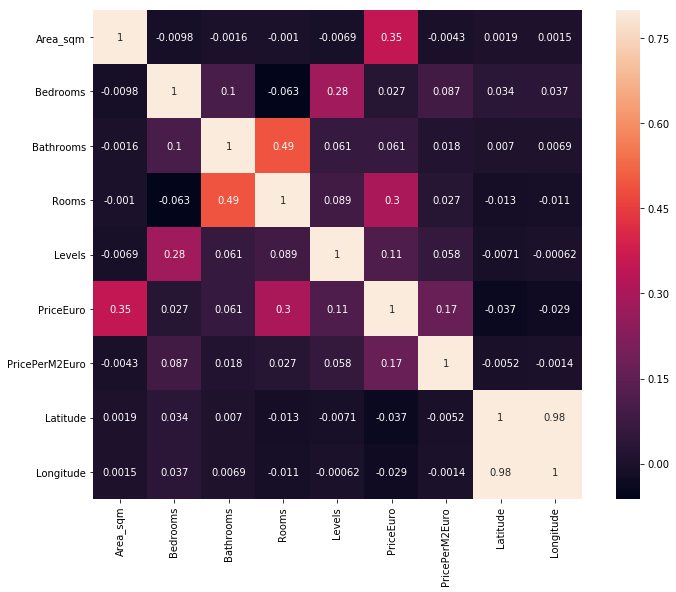

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Matrix Heatmap
corrmat = super_frame.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)

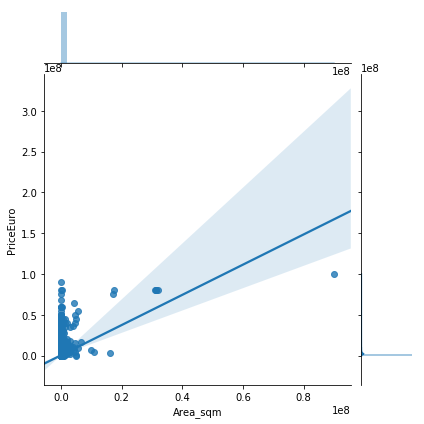

In [26]:
# Living Area vs Sale Price
sns.jointplot(x=super_frame['Area_sqm'], y=super_frame['PriceEuro'], kind='reg')

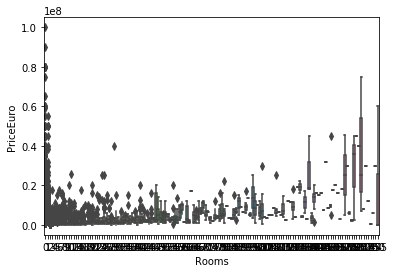

In [25]:
# Garage Area vs Sale Price
sns.boxplot(x=super_frame['Rooms'], y=super_frame['PriceEuro'])

In [31]:
# neighbourhood
super_frame.Neighbourhood.nunique()

860

In [32]:
# neighbourhoods with 0,0
super_frame.query("Latitude==0 and Longitude==0").Neighbourhood.nunique()

767

In [36]:
super_frame.Neighbourhood.value_counts(sort=True).head(10)

Achaia Patra                         4239
Athens - South Glyfada               3630
Athens - South Voula                 2801
Corfu Prefecture Corfu               2441
Athens - North Kifissia              2385
Cyclades Mykonos                     2073
Cyclades Paros                       1963
Kavala Prefecture Kavala             1934
Magnesia Volos                       1914
Thessaloniki - Suburbs Kalamaria     1846
Name: Neighbourhood, dtype: int64

In [37]:
# PropertyType
super_frame.PropertyType.nunique()

31

In [48]:
super_frame.PropertyType.value_counts(sort=True).head(10)

Land Plot            43053
Apartment            33584
Detached House       19122
Maisonette           12751
Parcel               12056
Store                 5553
Business building     4391
Office                3749
Villa                 3010
Hotel                 2632
Name: PropertyType, dtype: int64

## Datetime 

In [55]:
super_frame_lol = super_frame.set_index('ModifiedOn')

In [61]:
# Add columns with year, month, and weekday name
super_frame_lol['Year'] = super_frame_lol.index.year
super_frame_lol['Month'] = super_frame_lol.index.month
super_frame_lol['Weekday Name'] = super_frame_lol.index.weekday_name

In [63]:
import matplotlib.pyplot as plt

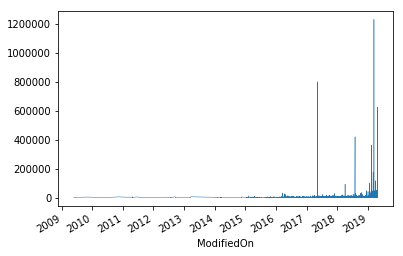

In [67]:
super_frame_lol['PricePerM2Euro'].plot(linewidth=0.5);

## Cleaning

In [13]:
super_frame.select_dtypes(include=['object']).columns

Index(['Neighbourhood', 'PropertyType', 'Floor', 'ConstructionYear'], dtype='object')

In [15]:
super_frame.select_dtypes(include=['int64','float64']).columns

Index(['Area_sqm', 'Bedrooms', 'Bathrooms', 'Rooms', 'Levels', 'PriceEuro',
       'PricePerM2Euro', 'Latitude', 'Longitude'],
      dtype='object')

check nulls

In [16]:
super_frame.isnull().any()

Unnamed: 0          False
Neighbourhood       False
Area_sqm            False
PropertyType        False
PriceEuro           False
PricePerM2Euro      False
Latitude            False
Longitude           False
ConstructionYear    False
ModifiedOn          False
dtype: bool

In [60]:
super_frame.isnull().values.any()

False

check empty values

In [83]:
# if super_frame.ConstructionYear.iloc[4]:
#     print("empty cell")

In [82]:
super_frame[super_frame.ConstructionYear==''].count()

Neighbourhood       57471
Area_sqm            57471
PropertyType        57471
PriceEuro           57471
PricePerM2Euro      57471
Latitude            57471
Longitude           57471
ConstructionYear    57471
ModifiedOn          57471
dtype: int64

check 0,0 for lat/lng

delete points out of Greece

find boundaries and add their centroid to missing values

## Mapping 

In [10]:
import folium

In [19]:
import folium
from folium.plugins import MarkerCluster

digi_map = folium.Map(location=[37.562120, 24.648375], zoom_start=8)
marker_cluster = MarkerCluster().add_to(digi_map)

In [20]:
locations = super_frame[["Latitude","Longitude"]]
locationlist = locations.values.tolist()

In [21]:
# point cluster
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=str(super_frame['PriceEuro'][point])).add_to(marker_cluster)

In [23]:
digi_map#.save('spitogatos.html')